# <center> Punto 3 Mezclas <center>

In [26]:
import pulp as lp #resolver problemas prog. lin.
import pandas as pd # archivos, tablas
import numpy as np  # numéricas
from IPython.display import display
from IPython.display import Image

## a) Diagrama

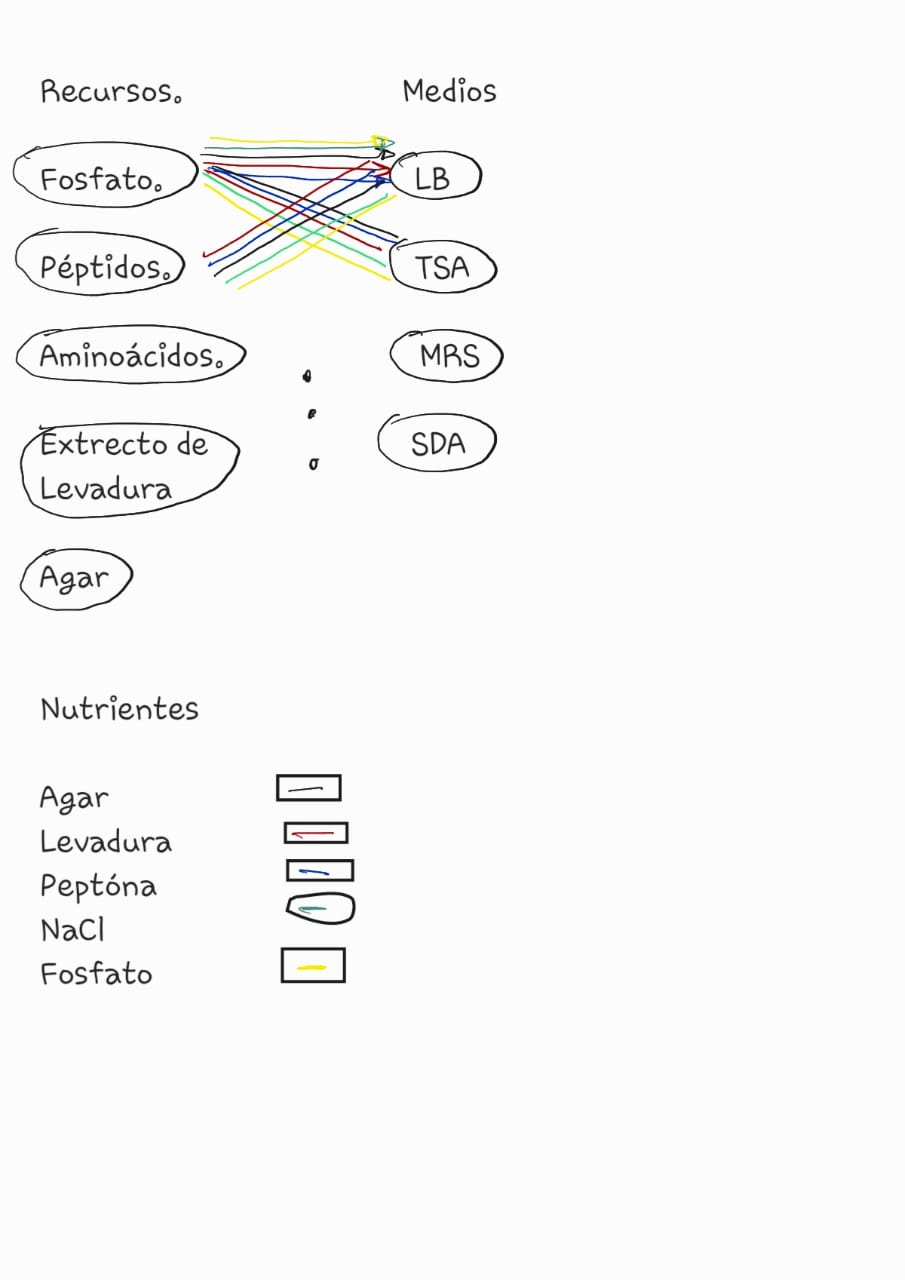

In [27]:

Image(filename="./img3.jpeg")

## b)

**Conjuntos:**

- Sea \(I\) el conjunto de recursos (Fosfato, Péptidos, Aminoácidos, Extracto de Levadura, Agar).
- Sea \(J\) el conjunto de medios de cultivo (LB, TSA, MRS, SDA).
- Sea \(K\) el conjunto de nutrientes (Agar, Levadura, Péptona, NaCl, Fosfato).
Índices:

i=0,...,4 recursos 

j=0,...,3 medios de cultivo

k=0,...,4 nutrientes


**Parámetros:**

- $R_{jk}min$: Proporción mínima del medio de cultivo \(j\) que debe producirse utilizando el nutriente k.
- $R_{jk}max$: Proporción máxima del medio de cultivo \(j\) que puede producirse utilizando  el nutriente k.
- $c_i$: Costo por kilogramo del recurso \(i\).
- $e_i$: Kilogramos disponibles del recurso \(i\).
- $p_{ik}$: Porcentaje de nutriente \(k\) en el recurso \(i\).
- $A$: Requerimiento total de cada cultivo

In [28]:
#Requerimientos min<suma xij< Max
R=pd.read_csv('punto3_requerimientos.csv',header=[0,1],index_col=[0,1])
display(R)

Medio de cultivo Nutrientes (%)                                 
Medio de cultivo           Agar Levadura Peptona    NaCl Fosfato
LB  Mínimo                  0.8      0.8     0.8   0.100     0.0
    Máximo                 15.0     22.8    35.0  10.000     0.0
TSA Mínimo                  1.2      0.5     1.4   0.100     0.0
    Máximo                 24.3     14.4    45.0   9.000     0.0
MRS Mínimo                  1.2      0.0     0.8   0.025     0.8
    Máximo                 11.0      0.0    11.4   1.000    72.0
SDA Mínimo                  0.0      0.0     0.5   0.000     0.0
    Máximo                 25.0      0.0    72.0   0.000     0.0

In [29]:
# P: Composición del nutriente como una proporción en una escala de cero a uno.

# D: kg disponibles por cada nutriente.

# C: Costo por kilogramo de cada recurso
# Importamos las tablas como un archivo
parameters=pd.read_csv('punto3_comp_costo.csv',header=[0,1],index_col=[0])
P=parameters['Composición [%]']/100
D=parameters['Disponible [kg] ']
C=parameters['Costo [$/kg] ']
display(parameters)
display(P)
display(C)
display(D)
# parameters.columns

Recursos              Composición [%]                                \
                                 Agar Levadura Peptona NaCl Fosfato   
Fosfato                             0        0       0    0     100   
Péptidos                            0        0      67    0       0   
Aminoácidos                         0        0      34    0      56   
Extracto de Levadura                0       75       0   12       0   
Agar                               80        0       0    1       0   

Recursos              Disponible [kg]  Costo [$/kg]   
                      Disponible [kg]  Costo [$/kg]   
Fosfato                            150           190  
Péptidos                           405           600  
Aminoácidos                         70            70  
Extracto de Levadura               100           200  
Agar                               130           486

,Agar,Levadura,Peptona,NaCl,Fosfato
Fosfato,0.0,0.00,0.00,0.00,1.00
Péptidos,0.0,0.00,0.67,0.00,0.00
Aminoácidos,0.0,0.00,0.34,0.00,0.56
Extracto de Levadura,0.0,0.75,0.00,0.12,0.00
Agar,0.8,0.00,0.00,0.01,0.00


,Costo [$/kg]
Fosfato,190
Péptidos,600
Aminoácidos,70
Extracto de Levadura,200
Agar,486


,Disponible [kg]
Fosfato,150
Péptidos,405
Aminoácidos,70
Extracto de Levadura,100
Agar,130


In [30]:
A=200 #kg


**Variables de Decisión:**

- $x_{ij}$: Cantidad del recurso \(i\) utilizado para producir el medio de cultivo \(j\).


**Función Objetivo:**

Minimizar el costo total:

$$
\text{Minimizar } Z = \sum_{i \in I} \sum_{j \in J} c_i \cdot x_{ij}
$$

In [31]:
I={key:val for key,val in enumerate(parameters.index)}
J={x[0] for x in R.index }
J={key:val for key,val in enumerate(J)}
K={key:val for key,val in enumerate(P.columns)}

In [32]:
print(I)
print(J)
print(K)

{0: 'Fosfato', 1: 'Péptidos', 2: 'Aminoácidos', 3: 'Extracto de Levadura ', 4: 'Agar'}
{0: 'SDA', 1: 'MRS', 2: 'LB', 3: 'TSA'}
{0: 'Agar', 1: 'Levadura', 2: 'Peptona', 3: 'NaCl', 4: 'Fosfato'}


In [33]:
# Aquí inicializamos el problema de programación lineal
prob=lp.LpProblem("punto_3_cultivos",lp.LpMinimize)

X=lp.LpVariable.dicts("X",((i,j) for i in I.keys() for j in J.keys()), lowBound=0)

In [34]:
# Definimos la función Objetivo y la añadimos al programa

In [35]:
# print(lp.lpSum([C.values[i][0]*X[(i,j)] for i in I for j in J]))
prob+=lp.lpSum([C.values[i][0]*X[(i,j)] for i in I for j in J])
# prob+=0
lp.lpSum([C.values[i][0]*X[(i,j)] for i in I for j in J])

190*X_(0,_0) + 190*X_(0,_1) + 190*X_(0,_2) + 190*X_(0,_3) + 600*X_(1,_0) + 600*X_(1,_1) + 600*X_(1,_2) + 600*X_(1,_3) + 70*X_(2,_0) + 70*X_(2,_1) + 70*X_(2,_2) + 70*X_(2,_3) + 200*X_(3,_0) + 200*X_(3,_1) + 200*X_(3,_2) + 200*X_(3,_3) + 486*X_(4,_0) + 486*X_(4,_1) + 486*X_(4,_2) + 486*X_(4,_3) + 0


**Restricciones:**

1. Restricciones de uso de recursos:

 $$
   R_{jk} min \leq \sum_{i \in I} x_{ij} \leq R_{jk}max \text{ para todo } j \in J, k \in K
   $$


2. Restricciones de producción total:

$$
   \sum_{i \in I} x_{ij} = 200 \text{ para todo } j \in J
  $$



3. Restricciones de disponibilidad:

   $$
   \sum_{j \in J} x_{ij} \leq e_i \text{ para todo } i \in I
   $$

Requerimientos min<suma xij< Max

Producción esperada A

Restricción mínimos recursos

In [36]:
for j,medio in J.items():
    for k,nutriente in K.items(): 
#         print(lp.lpSum([P[nutriente][recurso]*X[(i,j)] for i,recurso in I.items()])<=R.loc[( medio, 'Mínimo')][k])
        prob+=lp.lpSum([P[nutriente][recurso]*X[(i,j)] for i,recurso in I.items()])>=R.loc[( medio, 'Mínimo')][k]

Restricción máximos recursos

In [37]:
for j,medio in J.items():
    for k,nutriente in K.items():
#         print(lp.lpSum([P[nutriente][recurso]*X[(i,j)] for i,recurso in I.items()])<=R.loc[( medio, 'Mínimo')][k])
        prob+=lp.lpSum([P[nutriente][recurso]*X[(i,j)] for i,recurso in I.items()])<=R.loc[( medio, 'Máximo')][k]

Restricciones de balance material

In [38]:
for j,medio in J.items():
#         print(lp.lpSum([X[(i,j)] for i,recurso in I.items()])==A)
        prob+=lp.lpSum([X[(i,j)] for i,recurso in I.items()])<=A

Restricciones de los recursos disponibles

In [39]:
for i in I:
    print(lp.lpSum([X[(i,j)] for j in J])<=D.iloc[i])
    prob+=lp.lpSum([X[(i,j)] for j in J])<=D.iloc[i]

X_(0,_0) + X_(0,_1) + X_(0,_2) + X_(0,_3) <= 150
X_(1,_0) + X_(1,_1) + X_(1,_2) + X_(1,_3) <= 405
X_(2,_0) + X_(2,_1) + X_(2,_2) + X_(2,_3) <= 70
X_(3,_0) + X_(3,_1) + X_(3,_2) + X_(3,_3) <= 100
X_(4,_0) + X_(4,_1) + X_(4,_2) + X_(4,_3) <= 130


## Resolución del problema

Al resolver el problema observamos que no existe una solución factible al problema:

In [40]:
prob.solve()

Welcome to the CBC MILP Solver 
Version: 2.10.3 
Build Date: Dec 15 2019 

command line - /home/john/anaconda3/lib/python3.9/site-packages/pulp/solverdir/cbc/linux/64/cbc /tmp/5c795d709db14f50b00c6297482c5800-pulp.mps timeMode elapsed branch printingOptions all solution /tmp/5c795d709db14f50b00c6297482c5800-pulp.sol (default strategy 1)
At line 2 NAME          MODEL
At line 3 ROWS
At line 54 COLUMNS
At line 179 RHS
At line 229 BOUNDS
At line 230 ENDATA
Problem MODEL has 49 rows, 20 columns and 104 elements
Coin0008I MODEL read with 0 errors
Option for timeMode changed from cpu to elapsed
Presolve 5 (-44) rows, 5 (-15) columns and 10 (-94) elements
0  Obj 5194.5771 Primal inf 2.0356935 (3)
2  Obj 5367.6163
Optimal - objective value 5367.6163
After Postsolve, objective 5367.6163, infeasibilities - dual 0 (0), primal 0 (0)
Optimal objective 5367.61633 - 2 iterations time 0.002, Presolve 0.00
Option for printingOptions changed from normal to all
Total time (CPU seconds):       0.00   (Wall

1

In [51]:
# X_tot=pd.DataFrame([[X[(i,j)].varValue for j in J ]for i in I ], columns=list(materiales.values()))
print(I)
print(J)

{0: 'Fosfato', 1: 'Péptidos', 2: 'Aminoácidos', 3: 'Extracto de Levadura ', 4: 'Agar'}
{0: 'SDA', 1: 'MRS', 2: 'LB', 3: 'TSA'}


In [49]:
for i in I:
    for j in J:
        print(X[(i,j)].varValue,end='\t')
    print('')

0.0	0.0	0.0	0.0	
0.74626866	0.0	1.1940299	2.0895522	
0.0	2.3529412	0.0	0.0	
0.0	0.0	1.0666667	0.70833333	
0.0	2.5	1.0	1.5	


Para que haya solución factible se puede relajar la condición para la producción total:

2. Restricciones de producción total:

$$
   \sum_{i \in I} x_{ij} <= 200 \text{ para todo } j \in J
  $$


de esta forma sí habrá solución factible, puesto que no entra en contradicción con las restricciones de mínimo ni máximo